### 1.1

In [2]:
import numpy as np
import re
import matplotlib.pyplot as plt

# read in the text file
with open('Kritias.txt') as f:
    lines = f.readlines()

def show_char_distribution(lines):
    # get histogram of the characters
    frequency_table = {}
    for line in lines:
        for c in line:
            if c in frequency_table:
                frequency_table[c] += 1
            else:
                frequency_table[c] = 1

    # print characters in order of frequency
    for c in sorted(frequency_table, key=frequency_table.get, reverse=True):
        print(c, frequency_table[c])

show_char_distribution(lines)

  7547
e 4345
t 3202
a 2719
n 2490
o 2410
h 2271
i 2122
s 2048
r 2013
d 1538
l 1231
u 912
f 846
c 814
w 809
m 739
g 628
y 602
, 567
p 491
b 438
v 351
. 191
k 142
I 86
A 83
T 79
; 74

 64
x 55
S 36
E 34
q 33
z 31
C 29
: 27
H 26
M 21
O 20
R 17
- 17
j 16
— 14
P 13
W 11
F 11
N 11
L 10
B 9
' 5
U 3
? 3
D 3
Z 3
Y 2
G 2
! 1
J 1
V 1


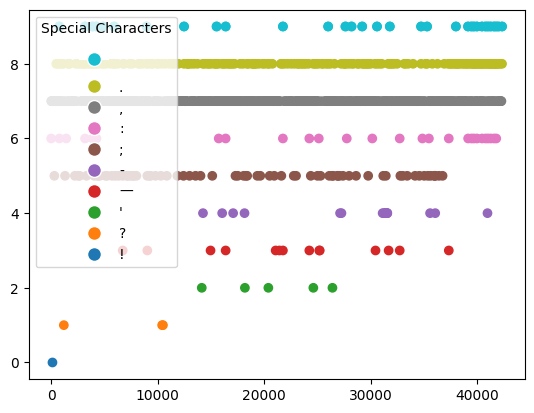

In [3]:
# plot, where special characters appear in the text
special_characters = ["!", "?", "'", "—", "-", ";", ":",",",".", "\n"]
appearances = []
character_index=0
for line in lines:
    for c in line:
        if c in special_characters:
            # if c is a special character, add to the appearances list the index of the character in the text 
            #      and the index of the special character in the special_characters list
            appearances.append([character_index,special_characters.index(c)])
        character_index+=1
        
# scatterplot
appearances = np.array(appearances)
plt.scatter(appearances[:,0], appearances[:,1], c=appearances[:,1], cmap='tab10')



# Create a legend for the y-axis levels
cmap = plt.get_cmap('tab10')
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(special_char_index/len(special_characters)*89/80), markersize=10, label=special_char_index) 
           for special_char_index, special_char in enumerate(special_characters)]
plt.legend(handles[::-1], special_characters[::-1], title="Special Characters", loc='upper left')

In [4]:
# find last appearance of ;
last_appearance = appearances[appearances[:,1]==5][-1][0]
print("Last appearance of ; is at character", last_appearance)
# what # sentence is this?
sentence_index = 0
character_index = 0
found = False
for line in lines:
    for c in line:
        if character_index == last_appearance:
            print("Last appearance of ; is in sentence", sentence_index)
            found = True
            break
        character_index+=1
        if c == "." or c == "!" or c == "?":
            sentence_index+=1
    if found:
        break



Last appearance of ; is at character 36734
Last appearance of ; is in sentence 150


In [5]:
# remove NAME: prefix of lines 
cleaned_lines = []
regex_name_prefix = re.compile(r'[A-Z]+: ') # removes things like "KRITAS: " 
regex_unwantend = re.compile(r"[,\-'\n:;—]") # gets replaced by space
regex_other_punctuation = re.compile(r'[!?]') # ends a sentence
for line in lines:
        match = regex_name_prefix.match(line)
        if match and line.startswith(match.group()):
            clean_line = line[len(match.group()):]
        else:
            clean_line = line
        # more cleaning
        clean_line = regex_unwantend.sub(' ', clean_line)
        clean_line = regex_other_punctuation.sub('.', clean_line)
        clean_line = clean_line.replace('  ', ' ')
        cleaned_lines.append(clean_line)

show_char_distribution(cleaned_lines)

  7631
e 4345
t 3202
a 2719
n 2490
o 2410
h 2271
i 2122
s 2048
r 2013
d 1538
l 1231
u 912
f 846
c 814
w 809
m 739
g 628
y 602
p 491
b 438
v 351
. 195
k 142
I 79
A 68
T 64
x 55
q 33
z 31
H 21
C 17
S 16
j 16
E 16
M 13
P 13
W 11
F 11
N 11
L 10
O 10
B 9
D 3
Z 3
Y 2
G 2
J 1
V 1


In [6]:
# get list of sentences
sentences = []
for line in cleaned_lines:
    sentences += line.split('.')
sentences = [s.strip().lower() for s in sentences if s.strip()]

    
# get list of words
words = []
for sentence in sentences:
    words += sentence.split()   
words = [w.strip() for w in words if w.strip()] # -> "" is not a word
words = list(set(words))



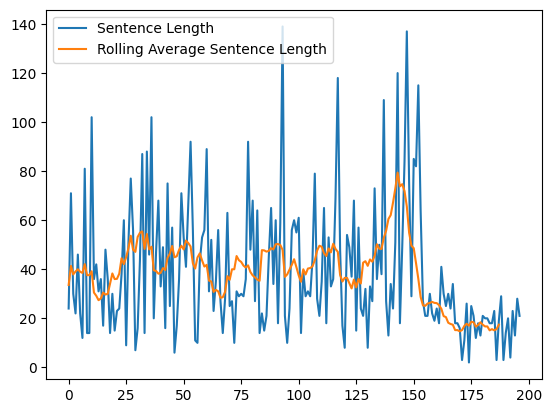

In [7]:
# print sentence length over time
sentence_lengths = [len(s.split()) for s in sentences]
plt.plot(sentence_lengths)
# print rolling average of sentence length
lookback = 10
rolling_average = np.convolve(sentence_lengths, np.ones(lookback)/lookback, mode='valid')
plt.plot(rolling_average)
# legend
plt.legend(["Sentence Length", "Rolling Average Sentence Length"])

In [8]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the list of stopwords
stopwords_list = stopwords.words('english')

# Remove stopwords from your text
filtered_words = [word for word in words if word not in stopwords_list and len(word) > 3]

# get filtered sentences
filtered_sentences = []
for sentence in sentences:
    filtered_sentence = ' '.join([word for word in sentence.split() if word not in stopwords_list and len(word) > 3])
    filtered_sentences.append(filtered_sentence)
    
example = 10
print(sentences[example])
print(filtered_sentences[example])

for if we consider the likenesses which painters make of bodies divine and heavenly and the different degrees of gratification with which the eye of the spectator receives them we shall see that we are satisfied with the artist who is able in any degree to imitate the earth and its mountains and the rivers and the woods and the universe and the things that are and move therein and further that knowing nothing precise about such matters we do not examine or analyze the painting all that is required is a sort of indistinct and deceptive mode of shadowing them forth
consider likenesses painters make bodies divine heavenly different degrees gratification spectator receives shall satisfied artist able degree imitate earth mountains rivers woods universe things move therein knowing nothing precise matters examine analyze painting required sort indistinct deceptive mode shadowing forth


[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [9]:
# select which words to use
relevant_words = filtered_words

In [10]:
# get term sentence matrix
term_sentence_matrix = np.zeros((len(relevant_words), len(sentences)))
for k, sentence in enumerate(sentences):
    for i, word in enumerate(relevant_words):
        term_sentence_matrix[i, k] = sentence.count(word)
        
normalized_term_sentence_matrix = np.zeros((len(relevant_words), len(sentences)))
for k in range(len(sentences)):
    normalized_term_sentence_matrix[:,k] = term_sentence_matrix[:,k] / np.linalg.norm(term_sentence_matrix[:,k])


# sentence 1: "term1 term2 term3"
# sentence 2: "term1 term3 term1 term 4 term 1"
# term sentence matrix: 
# term1 term2 term3 term4
# 1    1    1    0            /3
# 3    0    1    1            /5

# normalized term sentence matrix:
# term1 term2 term3 term4
# 1/3  1/3  1/3  0
# 3/5  0    1/5  1/5



print(term_sentence_matrix.shape)


(1541, 197)


In [11]:
# verify term sentence matrix
sentence_index = 20
print(sentences[sentence_index])

print("----")
for k, word in enumerate(relevant_words):
    if normalized_term_sentence_matrix[k, sentence_index] > 0:
        print(word, normalized_term_sentence_matrix[k, sentence_index])
        

the warning socrates which you have addressed to him i must also take to myself
----
socrates 0.35355339059327373
also 0.35355339059327373
warn 0.35355339059327373
warning 0.35355339059327373
addressed 0.35355339059327373
take 0.35355339059327373
must 0.35355339059327373
self 0.35355339059327373


In [12]:
# rank reduction by svd
U, s, V = np.linalg.svd(normalized_term_sentence_matrix) # make a standard svd
rank = 20 # specify the rank of the approximation we want
U_rank = U[:, :rank]
s_rank = np.diag(s[:rank]) # cut all the components to size of the rank
V_rank = V[:rank, :]
term_sentence_matrix_rank = U_rank @ s_rank @ V_rank # reconstruct the matrix with the rank reduction
print(term_sentence_matrix_rank)

[[-1.16596626e-03 -1.00327379e-03 -7.63715352e-04 ...  2.75435118e-03
   6.91633526e-04  3.11474496e-05]
 [ 8.76887971e-03 -8.71364677e-03 -1.17011112e-02 ... -3.37531276e-03
   5.02717290e-03 -4.31070788e-04]
 [-2.28102443e-04  1.47200294e-02 -1.05485577e-03 ... -2.79364837e-02
  -2.99668571e-02  4.01209200e-03]
 ...
 [ 2.34005993e-03 -5.96310704e-03  3.27125355e-03 ...  1.56067436e-02
   9.04291251e-03  5.23475717e-03]
 [ 1.80593814e-03  3.67869593e-04  9.20897076e-04 ...  1.81845262e-03
  -5.58805248e-03  4.55051845e-03]
 [-1.19860401e-03  1.43624986e-02 -2.93464707e-03 ... -5.81429283e-03
  -1.41406756e-04 -3.60025276e-03]]


Text(0.5, 1.0, 'Singular values')

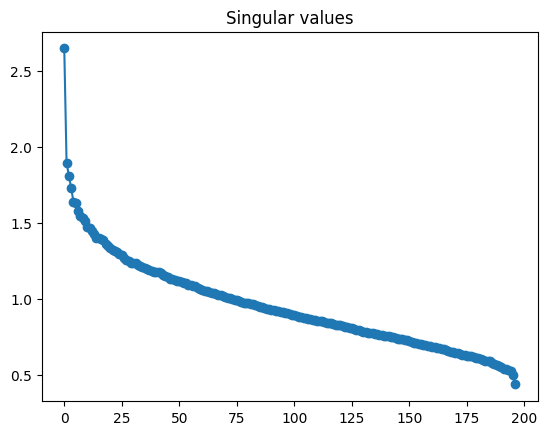

In [13]:
# plot singular values
plt.plot(s, 'o-')
plt.title("Singular values")

### 1.2

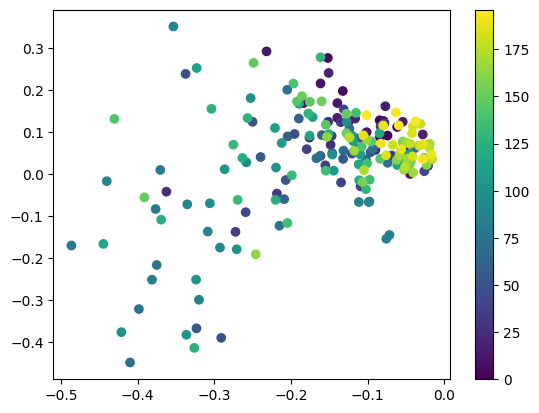

In [14]:
# use singular vecotrs for 2D representation of sentences
u1 = U_rank[:, 0] # orthonormal basis of the range fo the rank 2 approximation of the term sentence matrix
u2 = U_rank[:, 1]
dataX1= np.dot(u1, normalized_term_sentence_matrix)
dataX2= np.dot(u2, normalized_term_sentence_matrix)
plt.scatter(dataX1, dataX2, c=np.arange(len(sentences)), cmap='viridis',size=)
plt.colorbar()

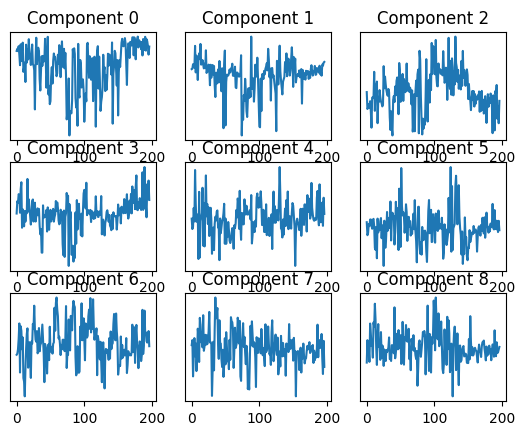

In [15]:
# get all components
component_coordinates = np.dot(U_rank.T, normalized_term_sentence_matrix)

# plot first 9 in 3x3 grid
fig, axs = plt.subplots(3, 3)
for k in range(3):
    for i in range(3):
        comp_num= k*3+i
        axs[k, i].plot(component_coordinates[comp_num, :])
        axs[k, i].set_title(f'Component {comp_num}')
        # remove axis labels
        axs[k, i].set_yticks([])

### 1.3

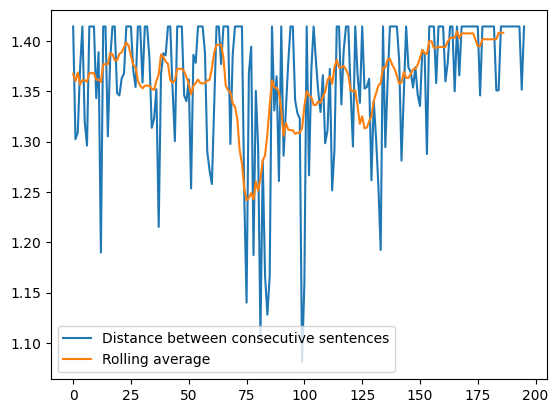

In [16]:
import matplotlib.pyplot as plt
# plot the distance between two consecutive sentences
distances = []
for k in range(len(sentences)-1):
    distance = np.linalg.norm(normalized_term_sentence_matrix[:, k] - normalized_term_sentence_matrix[:, k+1])
    distances.append(distance)
plt.plot(distances)
# rolling average
lookback = 10
rolling_average = np.convolve(distances, np.ones(lookback)/lookback, mode='valid')
plt.plot(rolling_average)
# add legend 
plt.legend(["Distance between consecutive sentences", "Rolling average"])


In [17]:
# implement k-means clustering
def kmeans(X, k, max_iter=100):
    n, d = X.shape
    # initialize the centroids from seed
    np.random.seed(6)
    # choose first k/2 and K/2 last points as centroids
    centroids = np.vstack([X[:k//2], X[-k//2:]])
    for _ in range(max_iter):
        # assign each point to the closest centroid
        labels = np.argmin(np.linalg.norm(X[:, None] - centroids, axis=2), axis=1)
        # update the centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        # check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels



Text(0.5, 1.0, 'Clusters of sentences')

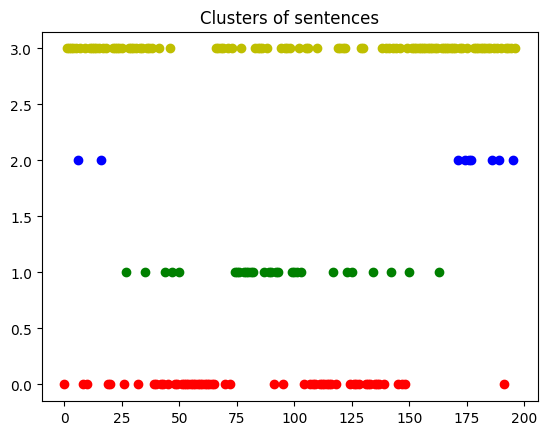

In [29]:
# plot the data with the k-means clustering
number_of_clusters = 4
labels = kmeans(term_sentence_matrix_rank.T, number_of_clusters)
colors = ['r', 'g', 'b','y','orange', 'purple']
for k in range(len(sentences)):
    plt.scatter(k, labels[k], color=colors[labels[k]])

plt.title("Clusters of sentences")

In [19]:
# get "topics" from centroids
centroids = []
for label in range(number_of_clusters):
    centroids.append(np.mean(term_sentence_matrix_rank.T[labels == label], axis=0))

for k, centroid in enumerate(centroids):
    print("Topic", k)
    # print top 10 words
    for word, value in sorted(zip(relevant_words, centroid), key=lambda x: x[1], reverse=True)[:10]:
        print(word, value)

Topic 0
round 0.04511099661251679
side 0.0427292650562099
place 0.03976183417923834
follow 0.039536276306318174
temple 0.0385734090431689
mountain 0.03683507310416928
many 0.036701038556510954
country 0.03606202937393845
also 0.03490372227083817
mountains 0.03379877135662527
Topic 1
land 0.24715987455984284
island 0.16803330707919417
part 0.08112409141259175
king 0.0599215665037968
name 0.04749558092736948
zone 0.04558788825655322
stadia 0.044435461641418934
call 0.0422715432210828
centre 0.04195045575447619
called 0.03986248947187301
Topic 2
hermocrates 0.24755758717709173
well 0.24625968639988396
timaeus 0.18367185813528472
critias 0.1025613077474296
said 0.08375482266694319
agree 0.06415629902153293
ought 0.06124868184602666
thought 0.044887697615774144
grant 0.04333567432511185
thoughts 0.04293964783252066
Topic 3
ever 0.03692965566485534
name 0.036602604169938914
gods 0.034026451752043434
king 0.03390239587981458
speak 0.02878138575928737
thing 0.028024854938172493
critias 0.02461

In [20]:
# calculate saliency scores
AAT=term_sentence_matrix_rank @term_sentence_matrix_rank.T
ATA= term_sentence_matrix_rank.T @ term_sentence_matrix_rank
u=np.linalg.eig(AAT).eigenvectors[0]
print(u.shape)
v=np.linalg.eig(ATA).eigenvectors[0]
print(v.shape)


(1541,)
(197,)


In [21]:
# show most salient words
word_saliency = {}
for k, word in enumerate(relevant_words):
    word_saliency[word] = np.linalg.norm(u[k])

print("saliency of atlantis:" , word_saliency["atlantis"])
for word in sorted(word_saliency, key=word_saliency.get, reverse=True)[:50]:
    print(word_saliency[word],"\t", word)


saliency of atlantis: 0.0006479443794504096
0.05957967215344868 	 road
0.057295726022844266 	 mindful
0.057295726022844266 	 cannot
0.04469697675039045 	 timber
0.04469697675039045 	 represent
0.04169319074458424 	 spot
0.04169319074458424 	 respect
0.04088828059790959 	 friends
0.03892751934260009 	 blood
0.03892751934260009 	 rescue
0.03746147281494913 	 furnish
0.03746147281494913 	 willing
0.03421768800008091 	 less
0.03315140606648563 	 harbours
0.03281708862749916 	 degree
0.03281708862749916 	 supped
0.031427052121442416 	 flashed
0.031427052121442416 	 bridge
0.03042413493194613 	 metropolis
0.03042413493194613 	 ensuring
0.029823077611217087 	 height
0.029823077611217087 	 lakes
0.029511442621080318 	 friendship
0.029511442621080318 	 voices
0.028719018367231747 	 sober
0.028719018367231747 	 eldest
0.02721091610957839 	 common
0.02721091610957839 	 supplied
0.026868040376896246 	 belongs
0.026868040376896246 	 souls
0.026341602091600615 	 incredible
0.026341602091600615 	 dri

### 1.4

In [22]:
# show most salient sentences
sentence_saliency = {}
for k, sentence in enumerate(sentences):
    sentence_saliency[sentence] = np.linalg.norm(v[k])
for sentence in sorted(sentence_saliency, key=sentence_saliency.get, reverse=True):
    print(sentence_saliency[sentence])
    print(sentence)
    print("-----------------")

0.18726229190293667
for if we consider the likenesses which painters make of bodies divine and heavenly and the different degrees of gratification with which the eye of the spectator receives them we shall see that we are satisfied with the artist who is able in any degree to imitate the earth and its mountains and the rivers and the woods and the universe and the things that are and move therein and further that knowing nothing precise about such matters we do not examine or analyze the painting all that is required is a sort of indistinct and deceptive mode of shadowing them forth
-----------------
0.16745870604637103
and they arranged the whole country in the following manner
-----------------
0.15449561458673317
there were also in the interior of the temple other images which had been dedicated by private persons
-----------------
0.15449561458673317
and around the temple on the outside were placed statues of gold of all the descendants of the ten kings and of their wives and there

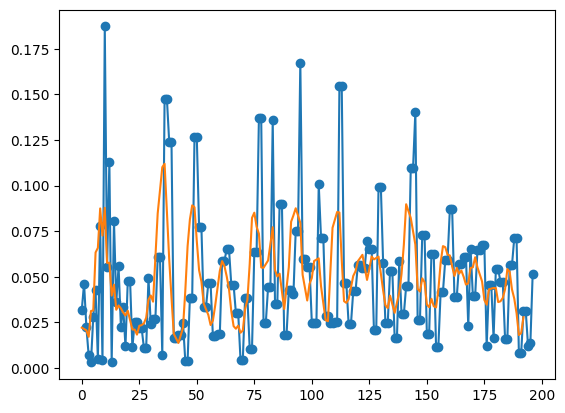

In [23]:
# plot saliency scores
plt.plot([sentence_saliency[sentence] for sentence in sentences], 'o-')
# rolling average
lookback = 5
rolling_average = np.convolve([sentence_saliency[sentence] for sentence in sentences], np.ones(lookback)/lookback, mode='valid')
plt.plot(rolling_average)


/home/bela/git/matrixmethods_dataanalysis/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/bela/git/matrixmethods_dataanalysis/.venv/lib/python3.10/site-packages/numpy/lib/histograms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/home/bela/git/matrixmethods_dataanalysis/.venv/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6865: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 4.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 2.000e+00, 4.000e+00,
        0.000e+00, 6.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 6.000e+00,
        4.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        4.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 4.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 1.363e+03, 1.500e+01, 9.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 0.000e+00,
        2.000e+00, 4.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 8.000e+00,
        2.000e+00, 4.000e+00, 0.000e+00, 4.000e+00, 1.000e+00, 2.000e+00,
        4.000e+00, 4.000e+00, 1.000e+00, 6.000e+00, 0.000e+00, 2.000e+00,
        4.000e+00, 0.000e+00, 2.000e+0

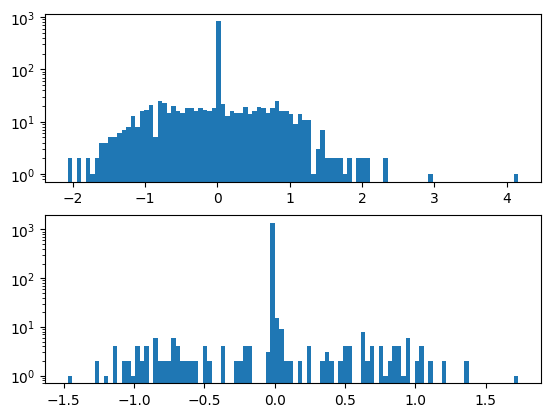

In [24]:
# calculate the follow frequency of words
split = 150
word_follow_frequency1 = np.zeros((len(relevant_words), len(relevant_words)))
word_follow_frequency2 = np.zeros((len(relevant_words), len(relevant_words)))
for sentence in sentences[:split]:
    words = sentence.split()
    for k in range(len(words)-1):
        for i in range(k+1, len(words)):
            if words[k] in relevant_words and words[i] in relevant_words:
                word_follow_frequency1[relevant_words.index(words[k]), relevant_words.index(words[i])] += 1
                break
for sentence in sentences[split:]:
    words = sentence.split()
    for k in range(len(words)-1):
        for i in range(k+1, len(words)):
            if words[k] in relevant_words and words[i] in relevant_words:
                word_follow_frequency2[relevant_words.index(words[k]), relevant_words.index(words[i])] += 1
                break

# plot the different eigenvalues as histogram with log scale
fig, axs = plt.subplots(2)

axs[0].hist(np.linalg.eig(word_follow_frequency1)[0], bins=100, log=True)
axs[1].hist(np.linalg.eig(word_follow_frequency2)[0], bins=100, log=True)
# axs[0].plot(np.linalg.eig(word_follow_frequency1)[0], 'o-')
# axs[1].plot(np.linalg.eig(word_follow_frequency2)[0], 'o-')

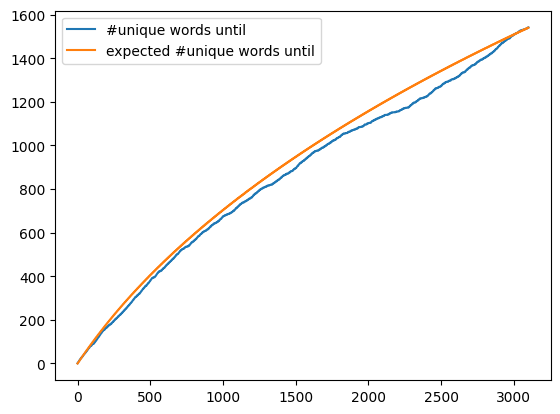

In [25]:
# another approach: look at all the unique words 
# get word sequence
word_sequence = []
for sentence in sentences:
    word_sequence += sentence.split()
word_sequence = [w for w in word_sequence if w in relevant_words]

# unique words until k
unique_words_until = []
unique_words_set = set()
for i in range(len(word_sequence)):
    unique_words_set.add(word_sequence[i])
    unique_words_until.append(len(unique_words_set))

#plot with log scale
plt.plot(unique_words_until)

# contrast with expected number (statistically, if words are drawn uniformly at random)
term_multiplicities = np.zeros(len(relevant_words))
for word in word_sequence:
    term_multiplicities[relevant_words.index(word)] += 1
# calculate expected number of unique words (formula found online: https://www.adellera.it/static_html/investigations/distinct_balls/distinct_balls.pdf)
def expected_unique_words(n, term_multiplicity):
    word_number = np.sum(term_multiplicity)
    sum=0
    for term_multiplicity in term_multiplicity:
        prod = 1
        for i in range(int(term_multiplicity)):
            prod = prod*(1-n/(word_number-i))
        sum += 1-prod
    return int(sum)

expected_unique_words_list = [expected_unique_words(i, term_multiplicities) for i in range(len(word_sequence))]
plt.plot(expected_unique_words_list)
plt.legend(["#unique words until", "expected #unique words until"])



Text(0.5, 1.0, 'Difference to expcted #unique words until')

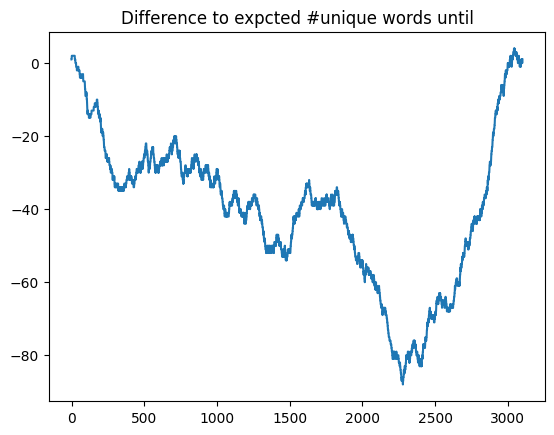

In [28]:
# plot the difference
plt.plot(np.array(unique_words_until) - np.array(expected_unique_words_list))
plt.title("Difference to expcted #unique words until")

In [27]:
# expect split to be at minimum
split = np.argmin(np.array(unique_words_until) - np.array(expected_unique_words_list))
# find the sentence that splits the text
sentences_used = filtered_sentences
sentence_index = -1
word_counter = 0
for k in range(len(sentences_used)):
    sentence_index = k
    word_counter += len(sentences_used[k].split())
    if word_counter > split:
        break
print(sentence_index)
print(sentences[sentence_index])


137
the leader was required to furnish for the war the sixth portion of a war chariot so as to make up a total of ten thousand chariots also two horses and riders for them and a pair of chariot horses without a seat accompanied by a horseman who could fight on foot carrying a small shield and having a charioteer who stood behind the man at arms to guide the two horses also he was bound to furnish two heavy armed soldiers two archers two slingers three stone shooters and three javelin men who were light armed and four sailors to make up the complement of twelve hundred ships
